# Image registration for book image

In [ ]:
import cv2
import numpy as np

# Open the image files.
img1_color = cv2.imread("align.jpg")  # Image to be aligned.
img2_color = cv2.imread("ref.jpg")    # Reference image.
 
# Convert to grayscale.
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
height, width = img2.shape
 
# Create ORB detector with 5000 features.
## used to creates keypoints on the reference image
orb_detector = cv2.ORB_create(5000)
 
# Find keypoints and descriptors.
# The first arg is the image, second arg is the mask
#  (which is not required in this case).
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)
 
# Match features between the two images.
# We create a Brute Force matcher with
# Hamming distance as measurement mode.

#Brute-Force matcher is simple. 
#It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
 
# Match the two sets of descriptors.
matches = matcher.match(d1, d2)
 
# Sort matches on the basis of their Hamming distance.
matches.sort(key = lambda x: x.distance)
 
# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*0.9)]
no_of_matches = len(matches)
 
# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))
 
for i in range(len(matches)):
  p1[i, :] = kp1[matches[i].queryIdx].pt
  p2[i, :] = kp2[matches[i].trainIdx].pt
 
# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
 
# Use this matrix to transform the
# colored image wrt the reference image.
transformed_img = cv2.warpPerspective(img1_color,
                    homography, (width, height))
 
# Save the output.
cv2.imwrite('output.jpg', transformed_img)



True

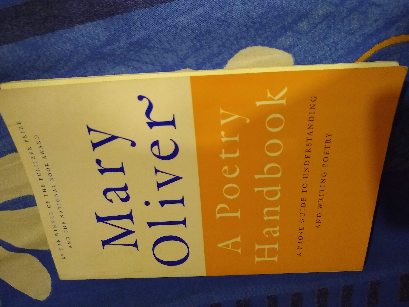

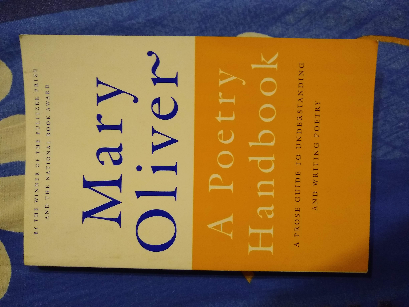

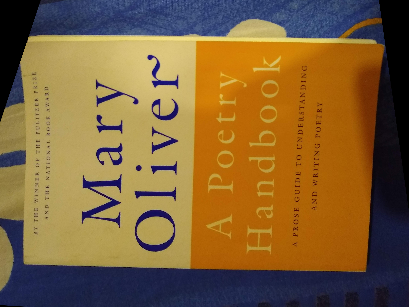

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.resize(img1_color,(409,307)))
cv2_imshow(cv2.resize(img2_color,(409,307)))
cv2_imshow(cv2.resize(transformed_img,(409,307)))

# Taking X-Ray and its manually distorted image

In [ ]:
import cv2
import numpy as np

def registerImage(img1,img2):
  # Open the image files.
  img1_color = img1  # Image to be aligned.
  img2_color = img2   # Reference image.
  
  # Convert to grayscale.

  img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
  height, width = img2.shape
  
  # Create ORB detector with 5000 features.
  ## used to creates keypoints on the reference image
  orb_detector = cv2.ORB_create(500)
  
  # Find keypoints and descriptors.
  # The first arg is the image, second arg is the mask
  #  (which is not required in this case).
  kp1, d1 = orb_detector.detectAndCompute(img1, None)
  kp2, d2 = orb_detector.detectAndCompute(img2, None)
  
  # Match features between the two images.
  # We create a Brute Force matcher with
  # Hamming distance as measurement mode.

  #Brute-Force matcher is simple. 
  #It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  
  # Match the two sets of descriptors.
  matches = matcher.match(d1, d2)
  
  # Sort matches on the basis of their Hamming distance.
  matches.sort(key = lambda x: x.distance)
  
  # Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*0.9)]
  no_of_matches = len(matches)
  
  # Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))
  
  for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
  
  # Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC,5.0)  
  # Use this matrix to transform the
  # colored image wrt the reference image.
  transformed_img = cv2.warpPerspective(img1_color,
                      homography, (width, height))
  
  # Save the output.
  # cv2.imwrite('output.jpg', transformed_img)

  img1_show = cv2.resize(img1_color,(320,320))
  img2_show = cv2.resize(img2_color,(320,320))
  img3_show = cv2.resize(transformed_img,(320,320))
  img = np.concatenate((img1_show,img2_show,img3_show), axis=1)
  cv2_imshow(img)


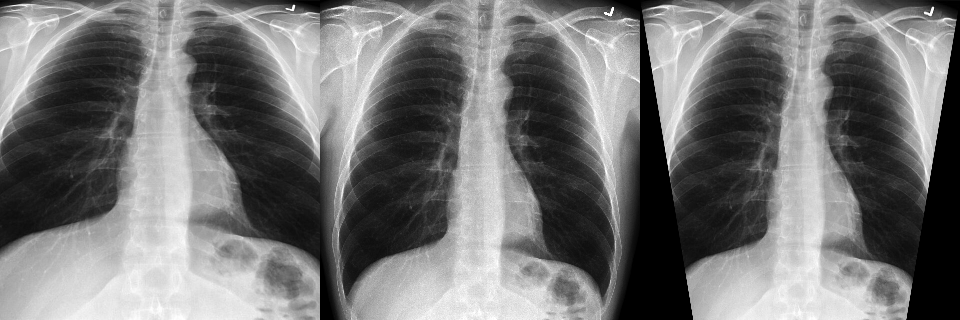

In [ ]:
xray_distorted = cv2.imread("xray_distorted.jpg")  # Image to be aligned.
xray_ref = cv2.imread("xray_ref.jpg")    # Reference image.
registerImage(xray_distorted,xray_ref)

# Taking X-Ray and its rotated and scaled image

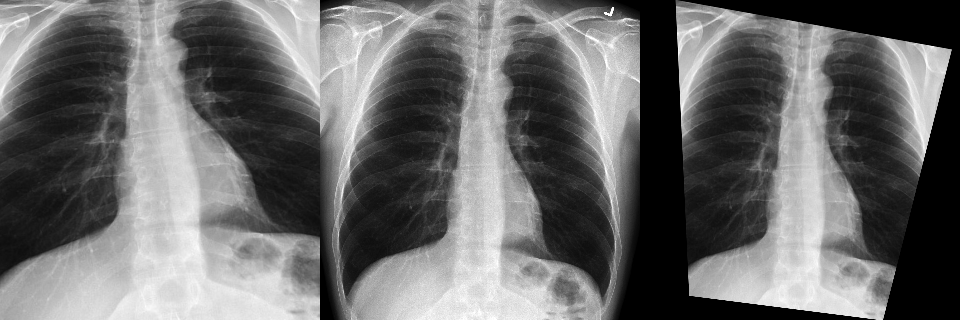

In [ ]:
xray_distorted_rot = cv2.imread("xray_distorted_rot.jpg")  # Image to be aligned.
xray_ref = cv2.imread("xray_ref.jpg")    # Reference image.
registerImage(xray_distorted_rot,xray_ref)

# Taking two different but similar images from same dataset

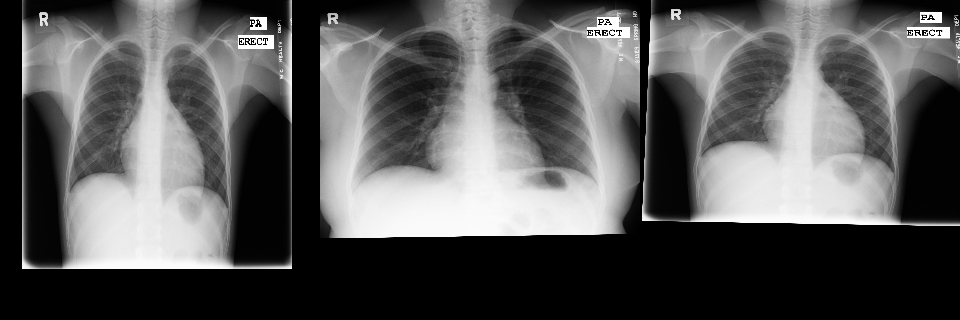

In [ ]:
same_other = cv2.imread("same_other.png")  # Image to be aligned.
same_ref = cv2.imread("same_ref.png")    # Reference image.
registerImage(same_other,same_ref)

# Repeating prev experiment with different images

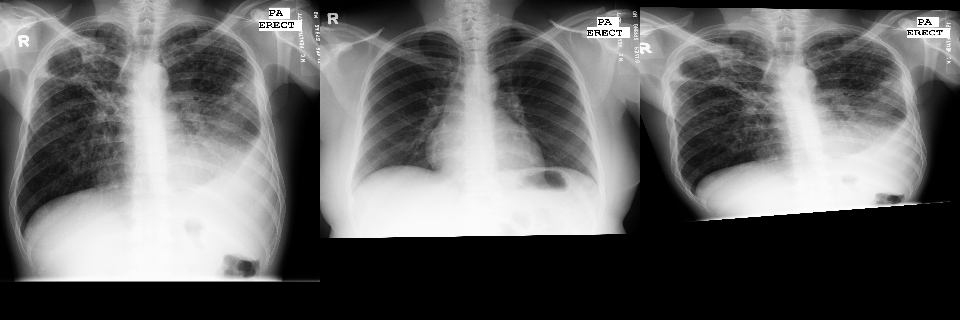

In [ ]:
same_other = cv2.imread("same_other1.png")  # Image to be aligned.
same_ref = cv2.imread("same_ref.png")    # Reference image.
registerImage(same_other,same_ref)

# Taking two X-Ray images from different datasets

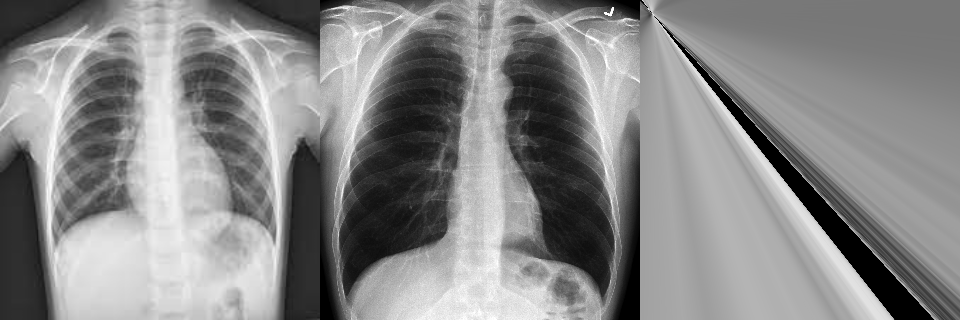

In [ ]:
testing = cv2.imread("testing.jpg")  # Image to be aligned.
xray_ref = cv2.imread("xray_ref.jpg")    # Reference image.
registerImage(testing,xray_ref)

# Real Task

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
masks_path = "/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/PredImagesWithMasks/masks/"
images_path = "/content/drive/MyDrive/Thesis_Space/Lesion_Segmentation/PredImagesWithMasks/imgs/"

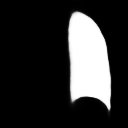

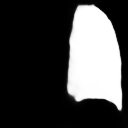

error: ignored

In [ ]:
reft = cv2.imread(masks_path+"mask_0.png")
imgt = cv2.imread(masks_path+"mask_1.png")

# reft = cv2.cvtColor(reft, cv2.COLOR_BGR2GRAY)
# imgt = cv2.cvtColor(imgt, cv2.COLOR_BGR2GRAY)

reft = reft.astype('uint8')
imgt = imgt.astype('uint8')
cv2_imshow(reft)
cv2_imshow(imgt)
registerImage(imgt,reft)

(128, 128, 3)

Image Number 50


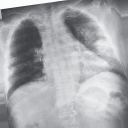

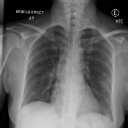

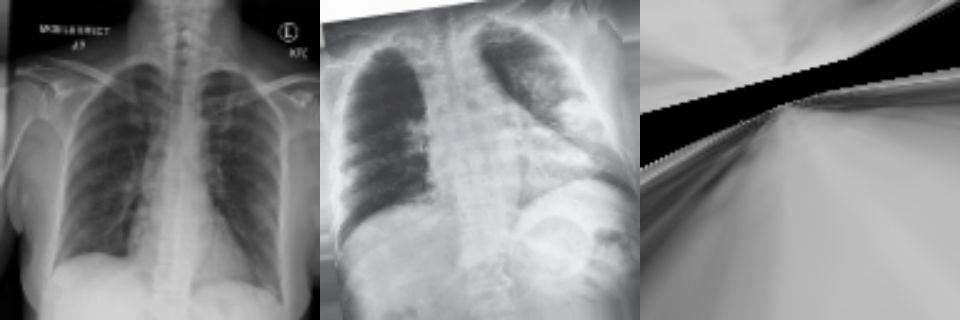

Image Number 100


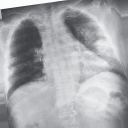

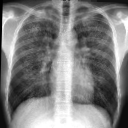

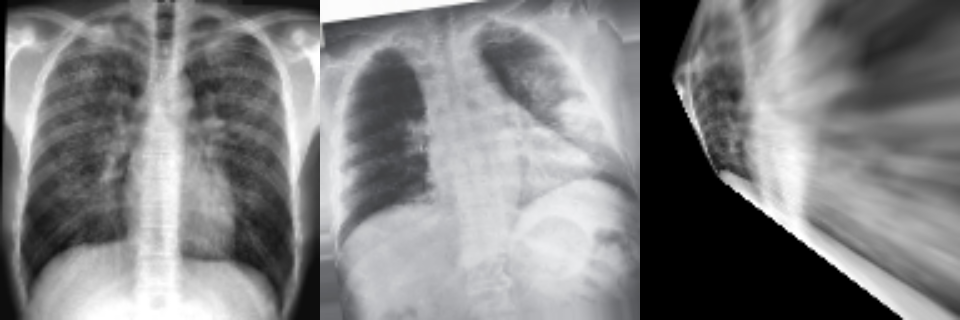

Image Number 150


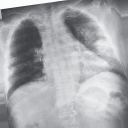

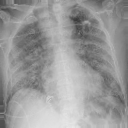

error: ignored

In [ ]:
reft = cv2.imread(images_path+"image_55.png")
i=1
for msk in os.listdir(masks_path):
  if(i%50==0):
    imgt = cv2.imread(images_path+"image_"+str(i)+".png")
    print("Image Number",i)
    cv2_imshow(reft)
    cv2_imshow(imgt)
    registerImage(imgt,reft)
  i+=1

In [ ]:
import cv2
import numpy as np

r_masks=[]

def registerMask(img1,img2):
  # Open the image files.
  img1_color = img1  # Image to be aligned.
  img2_color = img2   # Reference image.
  
  # Convert to grayscale.
  img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
  height, width = img2.shape
  
  # Create ORB detector with 5000 features.
  ## used to creates keypoints on the reference image
  orb_detector = cv2.ORB_create(5000)
  
  # Find keypoints and descriptors.
  # The first arg is the image, second arg is the mask
  #  (which is not required in this case).
  kp1, d1 = orb_detector.detectAndCompute(img1, None)
  kp2, d2 = orb_detector.detectAndCompute(img2, None)
  
  # Match features between the two images.
  # We create a Brute Force matcher with
  # Hamming distance as measurement mode.

  #Brute-Force matcher is simple. 
  #It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  
  # Match the two sets of descriptors.
  matches = matcher.match(d1, d2)
  
  # Sort matches on the basis of their Hamming distance.
  matches.sort(key = lambda x: x.distance)
  
  # Take the top 90 % matches forward.
  matches = matches[:int(len(matches)*0.9)]
  no_of_matches = len(matches)
  
  # Define empty matrices of shape no_of_matches * 2.
  p1 = np.zeros((no_of_matches, 2))
  p2 = np.zeros((no_of_matches, 2))
  
  for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
  
  # Find the homography matrix.
  homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
  
  # Use this matrix to transform the
  # colored image wrt the reference image.
  transformed_img = cv2.warpPerspective(img1_color,
                      homography, (width, height))
  r_masks.append(transformed_img)
  # Save the output.
  # cv2.imwrite('output.jpg', transformed_img)

  # img1_show = cv2.resize(img1_color,(320,320))
  # img2_show = cv2.resize(img2_color,(320,320))
  # img3_show = cv2.resize(transformed_img,(320,320))
  # img = np.concatenate((img1_show,img2_show,img3_show), axis=1)
  # cv2_imshow(img)

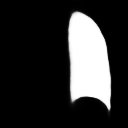

In [ ]:
test_ref = cv2.imread(masks_path+"mask_0.png")
# test_ref = test_ref.astype(float)
cv2_imshow(test_ref)

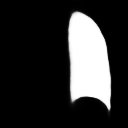

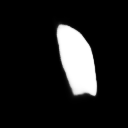

error: ignored

In [ ]:
ind=1;
for msk in os.listdir(masks_path):
  if ind%50==0:
    temp = cv2.imread(masks_path+msk)
    cv2_imshow(test_ref)
    cv2_imshow(temp)
    # temp = temp.astype(float)
    registerMask(temp,test_ref)
    cv2_imshow(r_masks[i])
  ind+=1